In [1]:
%load_ext autoreload
%autoreload 2

In [68]:
import torch
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [69]:
from dataloader import *
from display import *
# from dataloader import load_nosepoint, reag_img_part1

In [70]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(idxs=np.arange(32), root_dir=ROOT_DIR)

In [71]:
# Plotting a few input images and their nose keypoints.
show_keypoints(training_set[0][0], training_set[0][1])

AssertionError: (1, 480, 640)

In [7]:
from cnn import NoseFinder
from torch.nn import MSELoss
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader
from tqdm.contrib import tenumerate

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader=DataLoader(training_set,batch_size=16, shuffle=True)

model = NoseFinder().to(device)
loss_fn = F.mse_loss
learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate)

epochs = 10
for ep in range(epochs):
    print(f"Epoch {ep}")
    for i,(batched_imgs,batched_keypts) in tenumerate(train_loader):
        batched_imgs,batched_keypts = batched_imgs.to(device), batched_keypts.to(device)
        # print("input: ", img.shape)
        pred_keypts = model(batched_imgs)

        # Compute loss
        loss = loss_fn(pred_keypts, batched_keypts)

        # Print loss of current batch
        print(i, loss.item()) # .item() to look pretty

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  0%|          | 0/12 [00:00<?, ?it/s]Epoch 0
0 105621.421875
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 1
0 97060.1640625
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 2
0 16097.970703125
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 3
0 8453.4052734375
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 4
0 6122.138671875
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 5
0 2970.19091796875
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 6
0 2799.979736328125
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 7
0 3181.27392578125
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 8
0 2967.4072265625
  0%|          | 0/12 [00:00<?, ?it/s]Epoch 9
0 2489.01611328125
100%|██████████| 12/12 [00:26<00:00,  2.20s/it]


In [8]:
from copy import deepcopy
# clone the trained model to avoid mutations
trained_model = deepcopy(model)

In [9]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(idxs=np.arange(32, 40), root_dir=ROOT_DIR)

  0%|          | 0/48 [00:00<?, ?it/s]

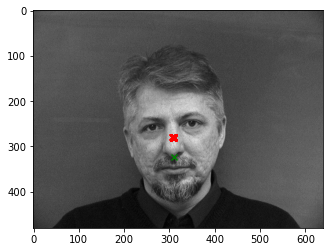

  2%|▏         | 1/48 [00:00<00:20,  2.28it/s]0 957.1359252929688


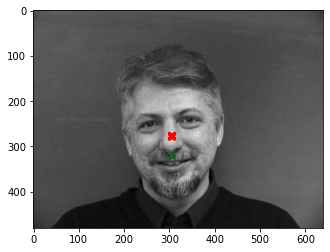

  4%|▍         | 2/48 [00:00<00:20,  2.25it/s]1 859.0744018554688


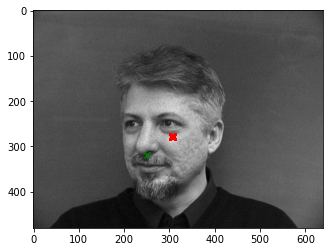

  6%|▋         | 3/48 [00:01<00:20,  2.22it/s]2 2325.008056640625


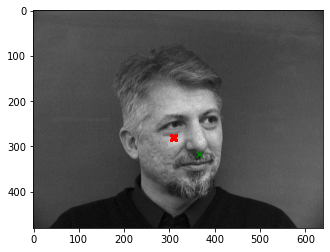

  8%|▊         | 4/48 [00:01<00:20,  2.15it/s]3 2338.353515625


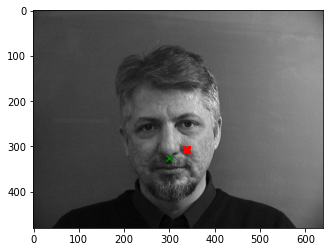

 10%|█         | 5/48 [00:02<00:20,  2.11it/s]4 948.1602172851562


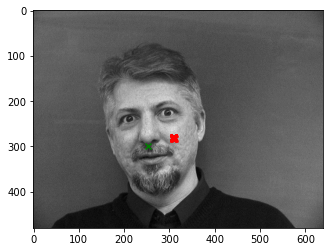

 12%|█▎        | 6/48 [00:02<00:19,  2.10it/s]5 1729.1312255859375


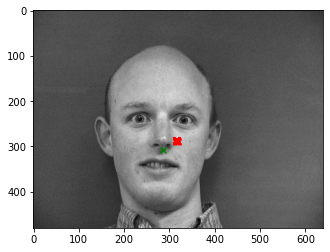

 15%|█▍        | 7/48 [00:03<00:20,  1.97it/s]6 702.2661743164062


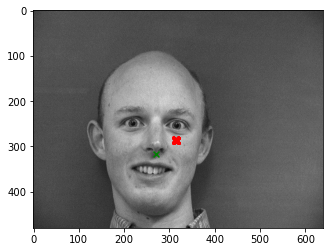

 17%|█▋        | 8/48 [00:03<00:19,  2.06it/s]7 1439.9244384765625


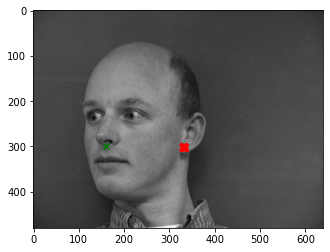

 19%|█▉        | 9/48 [00:04<00:19,  2.01it/s]8 14790.349609375


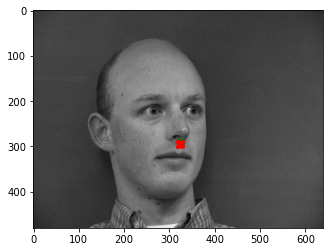

 21%|██        | 10/48 [00:05<00:24,  1.55it/s]9 24.472261428833008


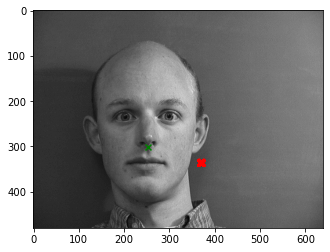

 23%|██▎       | 11/48 [00:05<00:22,  1.66it/s]10 7321.126953125


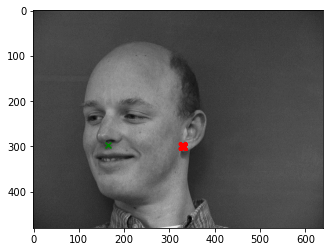

 25%|██▌       | 12/48 [00:06<00:20,  1.77it/s]11 13669.87109375


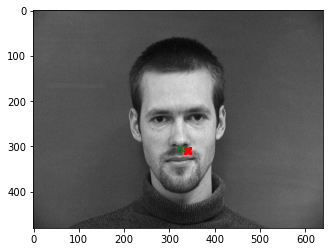

 27%|██▋       | 13/48 [00:06<00:19,  1.79it/s]12 148.92431640625


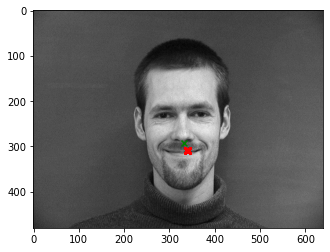

 29%|██▉       | 14/48 [00:07<00:18,  1.88it/s]13 153.33489990234375


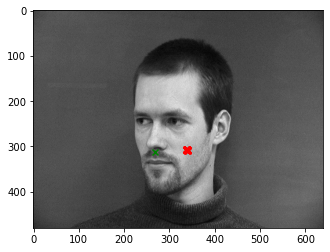

 31%|███▏      | 15/48 [00:07<00:17,  1.90it/s]14 2541.3798828125


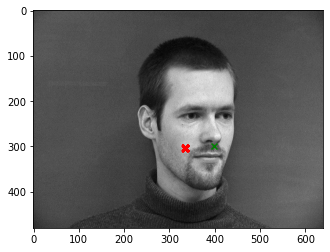

 33%|███▎      | 16/48 [00:08<00:16,  1.95it/s]15 2101.742919921875


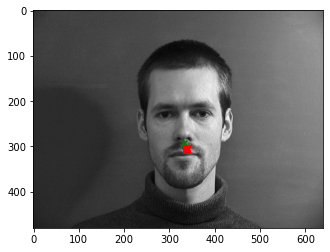

 35%|███▌      | 17/48 [00:08<00:15,  1.98it/s]16 106.36238861083984


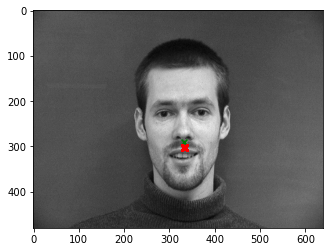

 38%|███▊      | 18/48 [00:09<00:15,  1.97it/s]17 83.30751037597656


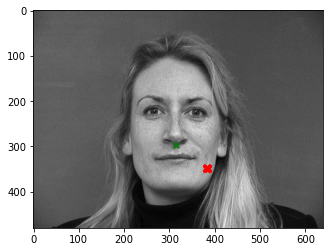

 40%|███▉      | 19/48 [00:09<00:15,  1.88it/s]18 3623.6689453125


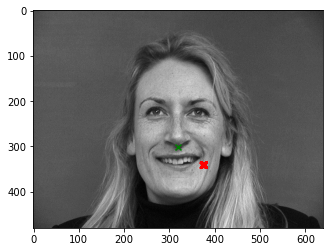

 42%|████▏     | 20/48 [00:10<00:14,  1.90it/s]19 2272.062255859375


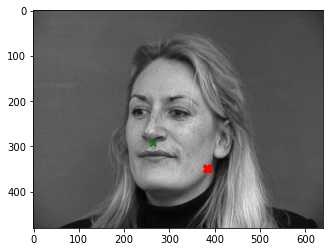

 44%|████▍     | 21/48 [00:10<00:13,  1.99it/s]20 8761.443359375


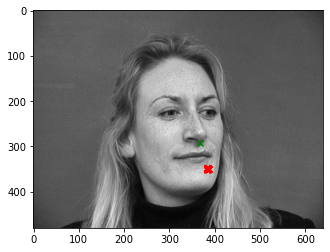

 46%|████▌     | 22/48 [00:11<00:13,  1.95it/s]21 1735.036865234375


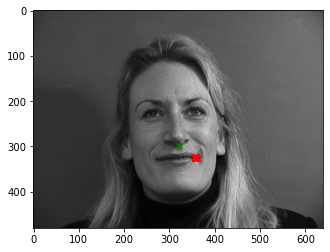

 48%|████▊     | 23/48 [00:11<00:13,  1.91it/s]22 995.8980102539062


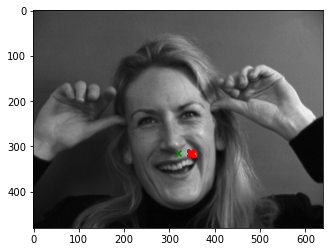

 50%|█████     | 24/48 [00:12<00:12,  1.93it/s]23 424.46734619140625


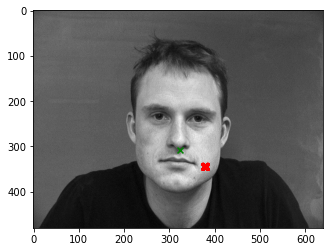

 52%|█████▏    | 25/48 [00:13<00:11,  1.93it/s]24 2242.118408203125


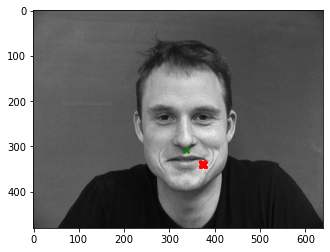

 54%|█████▍    | 26/48 [00:13<00:12,  1.76it/s]25 1216.873779296875


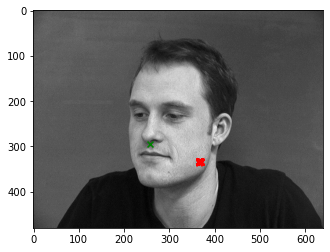

 56%|█████▋    | 27/48 [00:14<00:11,  1.83it/s]26 6714.2666015625


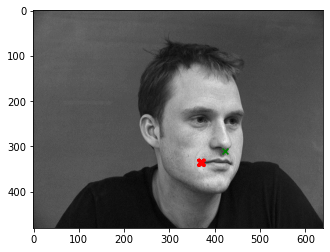

 58%|█████▊    | 28/48 [00:14<00:10,  1.87it/s]27 1694.1468505859375


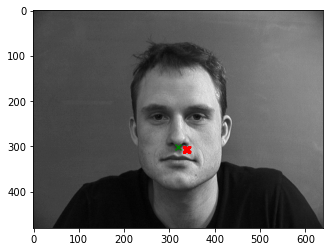

 60%|██████    | 29/48 [00:15<00:09,  1.91it/s]28 176.38465881347656


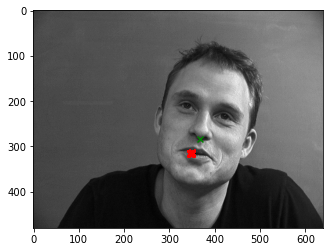

 62%|██████▎   | 30/48 [00:15<00:09,  1.82it/s]29 652.247314453125


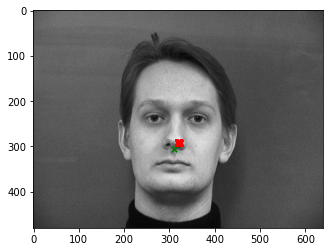

 65%|██████▍   | 31/48 [00:16<00:09,  1.81it/s]30 175.63766479492188


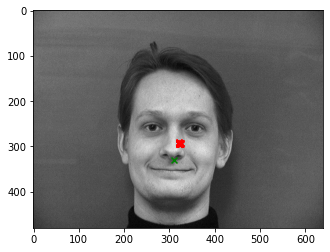

 67%|██████▋   | 32/48 [00:17<00:09,  1.72it/s]31 779.0681762695312


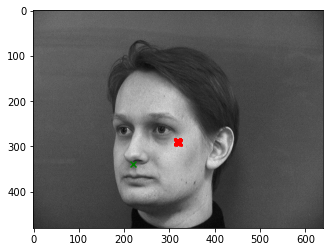

 69%|██████▉   | 33/48 [00:17<00:08,  1.71it/s]32 6178.83740234375


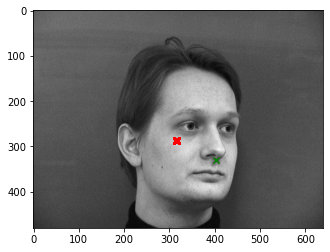

 71%|███████   | 34/48 [00:18<00:07,  1.82it/s]33 4741.06298828125


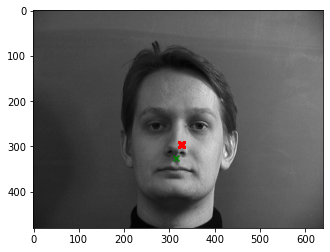

 73%|███████▎  | 35/48 [00:18<00:07,  1.73it/s]34 466.2697448730469


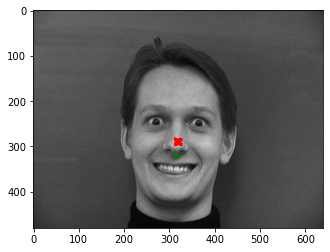

 75%|███████▌  | 36/48 [00:19<00:06,  1.74it/s]35 471.9962158203125


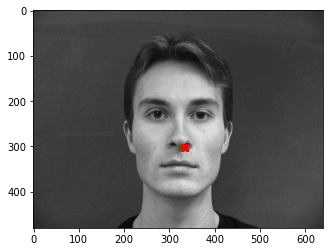

 77%|███████▋  | 37/48 [00:20<00:06,  1.60it/s]36 25.289180755615234


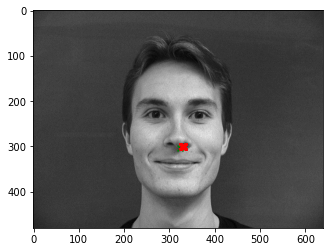

 79%|███████▉  | 38/48 [00:20<00:05,  1.71it/s]37 26.311689376831055


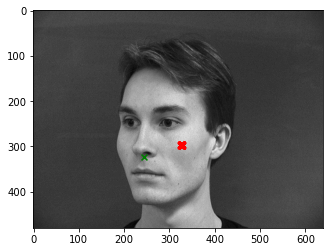

 81%|████████▏ | 39/48 [00:21<00:05,  1.78it/s]38 3830.49365234375


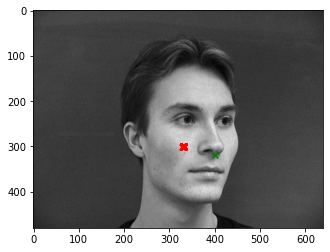

 83%|████████▎ | 40/48 [00:21<00:04,  1.76it/s]39 2697.4150390625


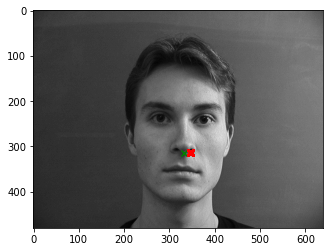

 85%|████████▌ | 41/48 [00:22<00:04,  1.72it/s]40 102.61197662353516


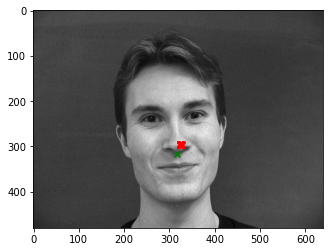

 88%|████████▊ | 42/48 [00:22<00:03,  1.66it/s]41 270.892578125


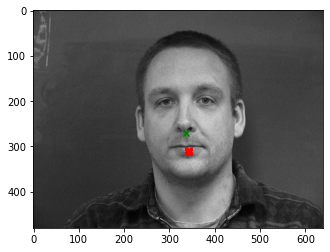

 90%|████████▉ | 43/48 [00:23<00:03,  1.63it/s]42 849.2078247070312


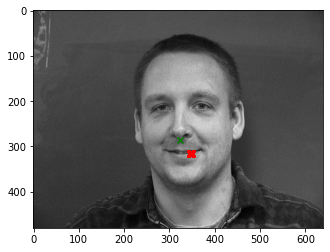

 92%|█████████▏| 44/48 [00:24<00:02,  1.68it/s]43 707.2457275390625


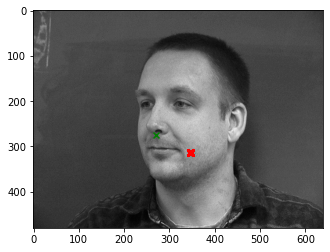

 94%|█████████▍| 45/48 [00:24<00:01,  1.60it/s]44 3654.757080078125


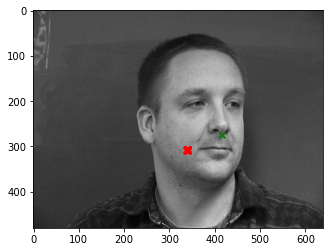

 96%|█████████▌| 46/48 [00:25<00:01,  1.73it/s]45 3582.589111328125


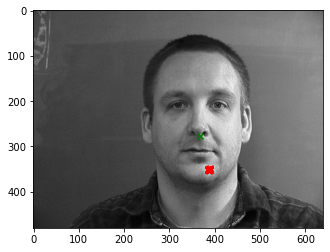

 98%|█████████▊| 47/48 [00:25<00:00,  1.64it/s]46 2908.773681640625


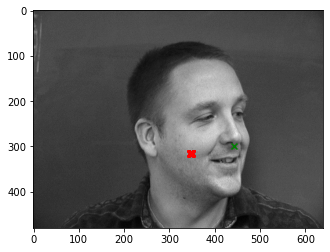

100%|██████████| 48/48 [00:26<00:00,  1.81it/s]47 4613.42138671875



In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_loader=DataLoader(validation_set,batch_size=1, shuffle=False)
loss_fn = F.mse_loss

for i, (img,keypts) in tenumerate(test_loader):
    img, keypts = img.to(device), keypts.to(device)
    pred_keypts = model(img)
    # print(keypts.shape, torch.squeeze(keypts, 0).shape)
    show_keypoints(torch.squeeze(img), torch.squeeze(keypts, 0), torch.squeeze(pred_keypts))
    # Compute and print loss.
    loss = loss_fn(pred_keypts, keypts)
    print(i, loss.item())

In [21]:
img.shape

torch.Size([48, 1, 2])

In [ ]:
# display sample images and keypoints
num_samples_to_display = 3
chosen = np.randint(len(validation_set), size=num_samples)
for i in chosen:
    img, nose_point, img_name, asf_name = validation_set[i]
    true_points = load_nose(asf_name)
    pred_points = trained_model(img)
    plt.figure()